 ### Importing the required libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data set



In [13]:
df=pd.read_excel(r"C:\Users\Lenovo\Downloads\cleaned_data_cognifyz.xlsx")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,İstanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,İstanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Task: Online Delivery

### Determine the percentage of restaurants that offer online delivery.

### Compare the average ratings of restaurants with and without online delivery.

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [25]:
x= df[df['Has Online delivery']=="Yes"]['Has Online delivery'].count()
x

2451

In [26]:
y= df.shape[0]
y

9551

### Calculating percentage of restaurants offering online delivery

In [34]:
Restaurants_offering_online_delivery_percentage = round((x/y)*100,2)
Restaurants_offering_online_delivery_percentage

25.66

### Average ratings of restaurants with online delivery.

In [40]:
x=df[['Aggregate rating','Has Online delivery']][df['Has Online delivery']=="Yes"].groupby('Has Online delivery').mean()
x

,Aggregate rating
Has Online delivery,
Yes,3.248837


### Average ratings of restaurants without online delivery.

In [43]:
y=df[['Aggregate rating','Has Online delivery']][df['Has Online delivery']=="No"].groupby('Has Online delivery').mean()
y

,Aggregate rating
Has Online delivery,
No,2.465296


### Concating x,y

In [49]:
comparison=pd.concat([x,y])
comparison

,Aggregate rating
Has Online delivery,
Yes,3.248837
No,2.465296


### Creating a bar plot to compare average ratings

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4876\3556901402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison.index,y=comparison["Aggregate rating"], palette="Purples")


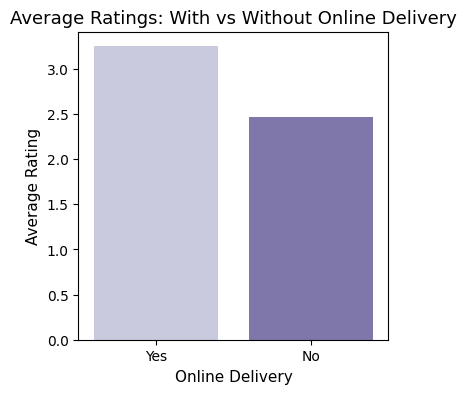

In [65]:
plt.figure(figsize=(4, 4))
sns.barplot(x=comparison.index,y=comparison["Aggregate rating"], palette="Purples")
plt.title('Average Ratings: With vs Without Online Delivery', fontsize=13)
plt.xlabel('Online Delivery', fontsize=11)
plt.ylabel('Average Rating', fontsize=11)
plt.show()